In [2]:
import csv

def load_output(filename):
    with open(f"{filename}.csv", "r", newline='') as f:
        reader = csv.reader(f)
        fitnesses = [list(map(float, row)) for row in reader]  # Convert values to float
    return fitnesses

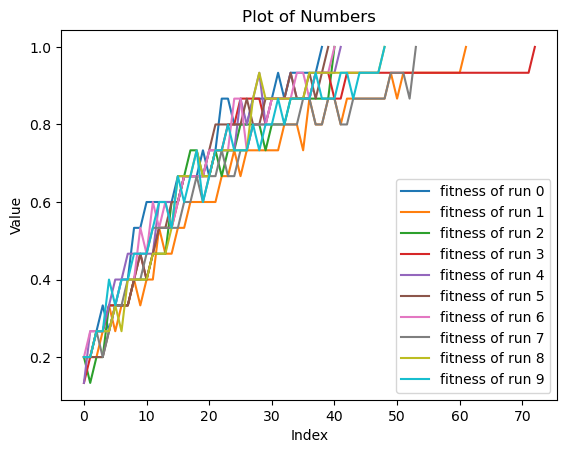

In [3]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.1")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

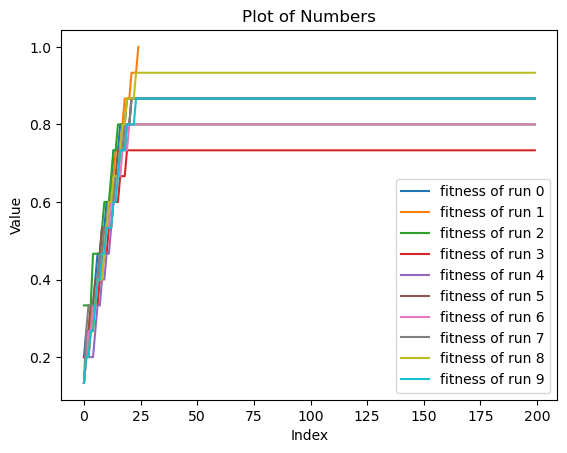

In [5]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.2a")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

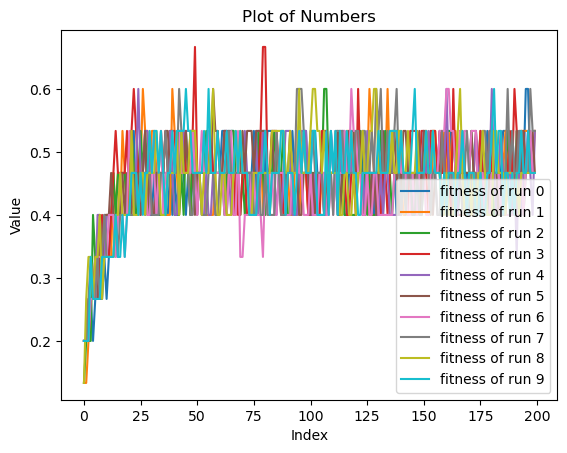

In [6]:
import matplotlib.pyplot as plt

# Plot the numbers
fitnesses = load_output("b1.2b")
for i, values in enumerate(fitnesses):
    plt.plot(values, label=f"fitness of run {i}")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Plot of Numbers")
plt.legend()

# Show the plot
plt.show()

In [8]:
dist1 =[len(x) for x in load_output("b1.1")]
dist2 =[len(x) for x in load_output("b1.2a")]
dist3 =[len(x) for x in load_output("b1.2b")]

C:\Users\marta\AppData\Local\Temp\ipykernel_25624\3119731333.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=data["Group"], y=data["Value"], size=5, palette="viridis")


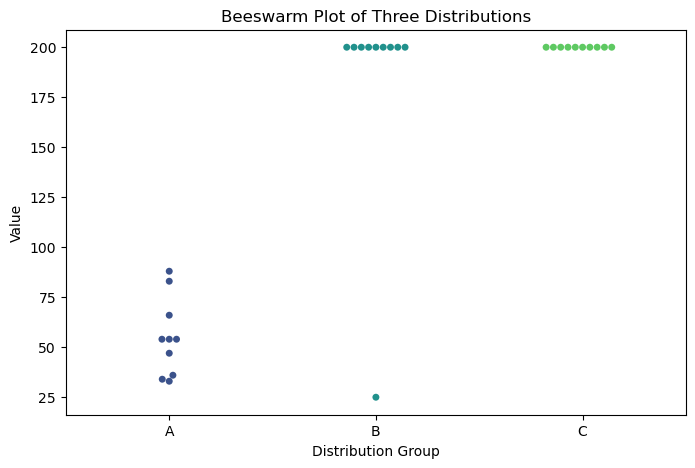

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate three distributions
np.random.seed(42)
# Combine into a single dataset
data = {
    "Value": np.concatenate([dist1, dist2, dist3]),
    "Group": ["A"] * 10 + ["B"] * 10 + ["C"] * 10  # Labels for each distribution
}

# Create the beeswarm plot
plt.figure(figsize=(8, 5))
sns.swarmplot(x=data["Group"], y=data["Value"], size=5, palette="viridis")

# Labels and title
plt.xlabel("Distribution Group")
plt.ylabel("Value")
plt.title("Beeswarm Plot of Three Distributions")

# Show the plot
plt.show()

File data/csv/entropy/ex-logo-mu1div15-K2-N200\1-gen40.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\8-gen40.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\1-gen50.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\4-gen50.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\7-gen50.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\8-gen50.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\1-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\3-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\4-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\5-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\6-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\7-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\8-gen60.csv not found!
File data/csv/entropy/ex-logo-mu1div15-K2-N200\1-gen70.csv not found!
File data/csv/entrop

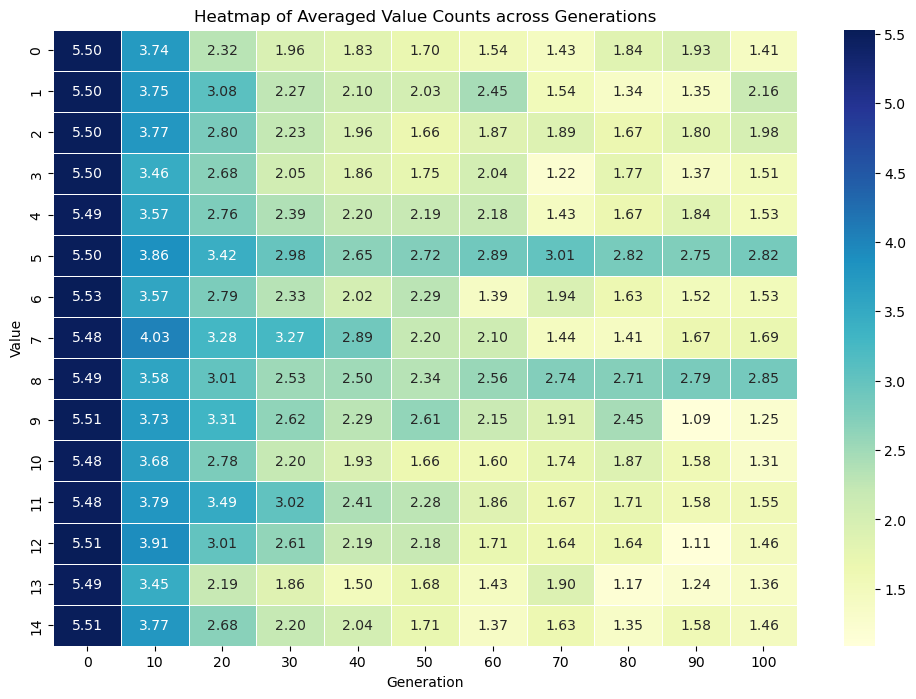

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing the CSV files
csv_dir = "data/csv/entropy/ex-logo-mu1div15-K2-N200"

# Initialize an empty list to hold all data
all_data = []

# Iterate through each generation file for each experiment (0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ...)
for gen_num in range(0, 101, 10):  # Files are named 0-gen0.csv, 1-gen0.csv, ..., 9-gen0.csv, ..., 0-gen100.csv
    for exp_num in range(10):  # We have 10 experiments (0-9)
        file_path = os.path.join(csv_dir, f"{exp_num}-gen{gen_num}.csv")
        
        if os.path.exists(file_path):  # Check if the file exists
            # Load the data
            df = pd.read_csv(file_path)
            
            # Add a column for the generation (extracted from the filename)
            df['Generation'] = gen_num
            df['Experiment'] = exp_num  # Add the experiment number for identification
            
            # Append the data to the all_data list
            all_data.append(df)
        else:
            print(f"File {file_path} not found!")

# Combine all data into a single DataFrame
if all_data:
    data = pd.concat(all_data, ignore_index=True)
    
    # Group by 'Value' and 'Generation' and compute the mean of 'Count' over the experiments
    averaged_data = data.groupby(['Value', 'Generation'])['Count'].mean().reset_index()
    
    # Pivot the data to get 'Value' on the rows, 'Generation' on the columns, and the averaged 'Count' as values
    heatmap_data = averaged_data.pivot_table(index='Value', columns='Generation', values='Count', aggfunc='mean')
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Averaged Value Counts across Generations')
    plt.xlabel('Generation')
    plt.ylabel('Value')
    plt.show()
else:
    print("No data available to plot.")